In [1]:
# импорт библиотек
from sklearn import model_selection
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier 
import xgboost as xgb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
import time
warnings.filterwarnings('ignore')

In [2]:
import kagglehub

In [3]:
path = kagglehub.dataset_download("bvmadduluri/wsdm-kkbox")

In [4]:
print("Path to dataset files:", path)

Path to dataset files: C:\Users\Admin\.cache\kagglehub\datasets\bvmadduluri\wsdm-kkbox\versions\1


## Подготовка данных.

In [6]:
#загрузка датасета

df = pd.read_csv("C:\\Users\\Admin\\.cache\\kagglehub\\datasets\\bvmadduluri\\wsdm-kkbox\\versions\\1\\train.csv")
df = df.sample(frac=0.8)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5901934 entries, 5727153 to 318053
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   msno                object
 1   song_id             object
 2   source_system_tab   object
 3   source_screen_name  object
 4   source_type         object
 5   target              int64 
dtypes: int64(1), object(5)
memory usage: 315.2+ MB


In [7]:
# Совмещение с датасетом "songs"
songs = pd.read_csv('C:\\Users\\Admin\\.cache\\kagglehub\\datasets\\bvmadduluri\\wsdm-kkbox\\versions\\1\\songs.csv')

In [8]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [9]:
df = pd.merge(df, songs, on='song_id', how='left')
del songs

In [10]:
# Совмещение с датасетом "members"
members = pd.read_csv("C:\\Users\\Admin\\.cache\\kagglehub\\datasets\\bvmadduluri\\wsdm-kkbox\\versions\\1\\members.csv")
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [11]:
df = pd.merge(df, members, on='msno', how='left')
del members

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901934 entries, 0 to 5901933
Data columns (total 18 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   msno                    object 
 1   song_id                 object 
 2   source_system_tab       object 
 3   source_screen_name      object 
 4   source_type             object 
 5   target                  int64  
 6   song_length             float64
 7   genre_ids               object 
 8   artist_name             object 
 9   composer                object 
 10  lyricist                object 
 11  language                float64
 12  city                    int64  
 13  bd                      int64  
 14  gender                  object 
 15  registered_via          int64  
 16  registration_init_time  int64  
 17  expiration_date         int64  
dtypes: float64(2), int64(6), object(10)
memory usage: 810.5+ MB


In [13]:
num_rows = df.count()[0]
print(num_rows, df.columns)

5901934 Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'song_length', 'genre_ids', 'artist_name',
       'composer', 'lyricist', 'language', 'city', 'bd', 'gender',
       'registered_via', 'registration_init_time', 'expiration_date'],
      dtype='object')


In [14]:
df.head(15)

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,city,bd,gender,registered_via,registration_init_time,expiration_date
0,NuuyYHpdffqDeGxXaJv0mc0ACbtSRZdyOSs+tCvKm3g=,xxWLfkIEeQAeJD4tFLoqDvrDFoS1PGb5+NT3BepHr/s=,search,Album more,album,1,250357.0,458,周湯豪 (NICKTHEREAL),周湯豪,周湯豪,3.0,11,38,female,9,20091109,20170821
1,wpYBmj3IDBioYY63WZEinl39n2XJjZ5TZ4sVGL03BJM=,eX+ylks3nC1gGXSzjifjryztRDMojjOnO582wwITh6Y=,my library,Local playlist more,local-library,0,255895.0,465,林俊傑 (JJ Lin),林俊傑,張思爾,3.0,1,0,NaN,4,20151121,20170904
2,ZTQ6+qtCvd4w4krqjW1AxY/q3Zgv2D/Dic8E/4PQCUk=,dAW40+ckJdOjNQqteJrkkVzciH74j9k2vXRgCFK1Obs=,my library,Local playlist more,local-library,1,230400.0,458,周杰倫 (Jay Chou),周杰倫,曾郁婷,3.0,1,0,NaN,7,20140408,20170912
3,RP6IfimmUEXbNvu1F1TcIu916wmuR5PyZcsXIkyQ46M=,qTyvtbeLdjBerVRlKnHa3kRR9mVtuHC+vFKYf705e7A=,discover,Online playlist more,online-playlist,0,244088.0,1609,SOHN,Christopher Taylor| Sam Dew,NaN,52.0,13,0,female,3,20140626,20180115
4,5LGtbWKwKifap3ECM6HO04gPY339RM0oF7D/MfWzUxg=,+cP03fE+hnJUB/v2PHLsD9UHBjmDIYvbuX+NrFqeudI=,search,Album more,album,1,279614.0,444|1259,BIGBANG,G-DRAGON| 전용준| 서원진,G-DRAGON| T.O.P| 태양,31.0,18,31,male,9,20081202,20171030
5,/Yd0Pa/VIxnVhTJ+Je0NSBzLjB97AElcltJozW8IgmU=,I+NrNoqmryYf7uutHQOVbZYntBfFRGf2gRROAX+3EEs=,my library,Online playlist more,online-playlist,0,231456.0,465,BIGBANG,NaN,NaN,17.0,5,31,female,9,20111122,20171027
6,MCU8fY3xZfeitC7oWmozzMQZu3KPR9FMY/s53Lfvjy8=,zrpibgya17Ts+MHFuwUDP7Kw3UvAWmT/XGBGTelfCYM=,my library,Local playlist more,local-library,1,221472.0,921,Various Artists,Yoda,GAEMI,31.0,15,37,female,9,20101230,20171026
7,DWK1L/uT6T4Zl5Ku+GgUjxpTOVqRx+VTHcVVO5YK04w=,+g6Inb6DmNXkbtdNx1Jz2ProBuS3TnkUE27g++JvWsw=,my library,Local playlist more,local-library,0,277440.0,2157,楊靜,張燕清,張燕清,10.0,1,0,male,3,20140916,20180228
8,3n6ex0n0uqpN8b/VseYUos7xQblh6gd5kNAxm46vLR0=,MwZaD94L4Wl4APdJSVQF5JPt+xH6hb2KtWpFsjwYUlo=,my library,Local playlist more,local-playlist,1,199134.0,1609,Mike Posner,Mike Posner| Martin Terefe,NaN,52.0,5,25,male,3,20131214,20171022
9,nRRcf8qc8+Ms6LcDzcj8g/oDCGoOOXP9Ueje25N7u4s=,6LdT9BiGIlQ3rJped7PACqnrzstFXz8dXD6MmmsA8uI=,discover,Discover Chart,online-playlist,1,257555.0,465,陳奕迅 (Eason Chan),Christopher Chak,NaN,3.0,1,0,NaN,7,20140116,20170915


In [15]:
# Отсутствующие значения в процентах
df.isnull().sum()/df.isnull().count()*100

msno                       0.000000
song_id                    0.000000
source_system_tab          0.336669
source_screen_name         5.626596
source_type                0.292768
target                     0.000000
song_length                0.001440
genre_ids                  1.605220
artist_name                0.001440
composer                  22.707133
lyricist                  43.079896
language                   0.001999
city                       0.000000
bd                         0.000000
gender                    40.130456
registered_via             0.000000
registration_init_time     0.000000
expiration_date            0.000000
dtype: float64

In [16]:
# замена значений
for i in df.select_dtypes(include=['object']).columns:
    df[i][df[i].isnull()] = 'unknown'
df = df.fillna(value=0)

In [17]:
#Разделение даты
# registration_init_time
df.registration_init_time = pd.to_datetime(df.registration_init_time, format='%Y%m%d', errors='ignore')
df['registration_init_time_year'] = df['registration_init_time'].dt.year
df['registration_init_time_month'] = df['registration_init_time'].dt.month
df['registration_init_time_day'] = df['registration_init_time'].dt.day

# expiration_date
df.expiration_date = pd.to_datetime(df.expiration_date,  format='%Y%m%d', errors='ignore')
df['expiration_date_year'] = df['expiration_date'].dt.year
df['expiration_date_month'] = df['expiration_date'].dt.month
df['expiration_date_day'] = df['expiration_date'].dt.day

In [18]:
df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,NuuyYHpdffqDeGxXaJv0mc0ACbtSRZdyOSs+tCvKm3g=,xxWLfkIEeQAeJD4tFLoqDvrDFoS1PGb5+NT3BepHr/s=,search,Album more,album,1,250357.0,458,周湯豪 (NICKTHEREAL),周湯豪,...,female,9,2009-11-09,2017-08-21,2009,11,9,2017,8,21
1,wpYBmj3IDBioYY63WZEinl39n2XJjZ5TZ4sVGL03BJM=,eX+ylks3nC1gGXSzjifjryztRDMojjOnO582wwITh6Y=,my library,Local playlist more,local-library,0,255895.0,465,林俊傑 (JJ Lin),林俊傑,...,unknown,4,2015-11-21,2017-09-04,2015,11,21,2017,9,4
2,ZTQ6+qtCvd4w4krqjW1AxY/q3Zgv2D/Dic8E/4PQCUk=,dAW40+ckJdOjNQqteJrkkVzciH74j9k2vXRgCFK1Obs=,my library,Local playlist more,local-library,1,230400.0,458,周杰倫 (Jay Chou),周杰倫,...,unknown,7,2014-04-08,2017-09-12,2014,4,8,2017,9,12
3,RP6IfimmUEXbNvu1F1TcIu916wmuR5PyZcsXIkyQ46M=,qTyvtbeLdjBerVRlKnHa3kRR9mVtuHC+vFKYf705e7A=,discover,Online playlist more,online-playlist,0,244088.0,1609,SOHN,Christopher Taylor| Sam Dew,...,female,3,2014-06-26,2018-01-15,2014,6,26,2018,1,15
4,5LGtbWKwKifap3ECM6HO04gPY339RM0oF7D/MfWzUxg=,+cP03fE+hnJUB/v2PHLsD9UHBjmDIYvbuX+NrFqeudI=,search,Album more,album,1,279614.0,444|1259,BIGBANG,G-DRAGON| 전용준| 서원진,...,male,9,2008-12-02,2017-10-30,2008,12,2,2017,10,30


In [19]:
# Преобразование дат в категории
df['registration_init_time'] = df['registration_init_time'].astype('category')
df['expiration_date'] = df['expiration_date'].astype('category')

In [20]:
# Трансформация объектов в категории
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    
# кодирование категориальных признаков
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes

In [21]:
bins=df.source_system_tab[:100]
mpl.rcParams['agg.path.chunksize'] = 10000

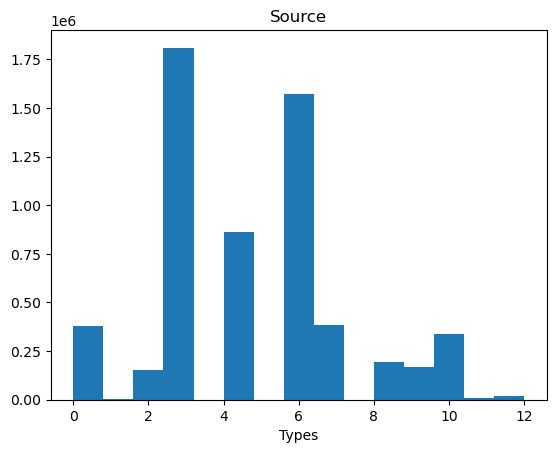

In [22]:
#вывод графика источников
plt.figure()
y=df.target
plt.hist(df['source_type'], bins = 15)
plt.xlabel('Types')
plt.title("Source")
plt.show()

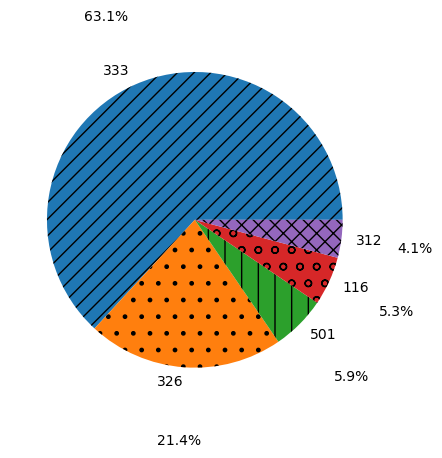

In [23]:
#вывод графика частоты жанров
y=df.groupby(['genre_ids'])['genre_ids'].value_counts().sort_values(ascending=False)[:5]
plt.pie(df.groupby(['genre_ids'])['genre_ids'].value_counts().sort_values(ascending=False)[:5], autopct='%1.1f%%', labels=y.index, hatch=['//','.','|','o','xx'],pctdistance=1.5, labeldistance=1.1)
plt.show()

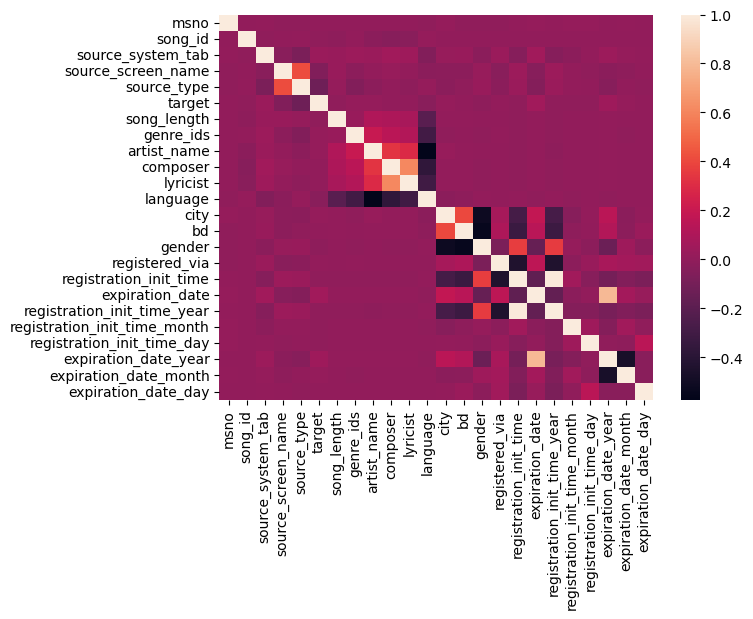

In [24]:
# матрица корреляций
plt.figure(figsize=[7,5])
sns.heatmap(df.corr())
plt.show()

In [25]:
df = df.drop(['expiration_date', 'lyricist'], axis=1)

In [26]:
#деление на категории длины песни
df['CatS']=pd.qcut(df['song_length'], q=8,precision=0)
df[['CatS','target']].groupby(['CatS'],).mean().sort_values(by='CatS')

,target
CatS,
"(-1.0, 195944.0]",0.470936
"(195944.0, 214726.0]",0.504368
"(214726.0, 228855.0]",0.516199
"(228855.0, 241789.0]",0.518909
"(241789.0, 257091.0]",0.497606
"(257091.0, 272160.0]",0.520841
"(272160.0, 291317.0]",0.519772
"(291317.0, 10851706.0]",0.481241


In [27]:
def rvalue(interval):
    return interval.right

df["CatS"] = df['CatS'].apply(rvalue)
df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day,CatS
0,12265,314097,6,0,0,1,250357.0,326,32850,62020,...,0,9,1390,2009,11,9,2017,8,21,257091.0
1,29046,215865,3,8,3,0,255895.0,333,34460,64726,...,2,4,3435,2015,11,21,2017,9,4,257091.0
2,17914,208900,3,8,3,1,230400.0,326,32841,62005,...,2,7,2844,2014,4,8,2017,9,12,241789.0
3,13920,276236,0,11,6,0,244088.0,116,23692,11337,...,0,3,2923,2014,6,26,2018,1,15,257091.0
4,3436,3256,6,0,0,1,279614.0,313,2688,19549,...,1,9,1137,2008,12,2,2017,10,30,291317.0


In [28]:
from sklearn.preprocessing import LabelEncoder
#добавление категорий в датафрейм
encoder = LabelEncoder()
df['CatS'] = encoder.fit_transform(df[['CatS']])
df.drop(['song_length'], axis=1)
df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day,CatS
0,12265,314097,6,0,0,1,250357.0,326,32850,62020,...,0,9,1390,2009,11,9,2017,8,21,4
1,29046,215865,3,8,3,0,255895.0,333,34460,64726,...,2,4,3435,2015,11,21,2017,9,4,4
2,17914,208900,3,8,3,1,230400.0,326,32841,62005,...,2,7,2844,2014,4,8,2017,9,12,3
3,13920,276236,0,11,6,0,244088.0,116,23692,11337,...,0,3,2923,2014,6,26,2018,1,15,4
4,3436,3256,6,0,0,1,279614.0,313,2688,19549,...,1,9,1137,2008,12,2,2017,10,30,6


In [29]:
y=df['target']
x=df.drop(columns=['target'])

# Модели Классификаций

In [31]:
#импорт моделей классификаций
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score

In [32]:
#Создание списка моделей
classs=[
    KNeighborsClassifier(5),
    SVC(probability=True, kernel='rbf'),
    DecisionTreeClassifier(),
    GaussianNB(),
    LogisticRegression(),
    RandomForestClassifier(),
]

In [33]:
#создание колонок и обучение моделей
log_col=["Classs","Acc"]
log=pd.DataFrame(columns=log_col)
x_train, x_test, y_train, y_test = train_test_split(x[0:2000],y[0:2000],test_size=0.2,random_state=42)
acc_dict={}

In [34]:
start = time.perf_counter()

In [35]:
#обучение каждой модели
for clf in classs:
    name=clf.__class__.__name__
    clf.fit(x_train, y_train)
    train_predictions = clf.predict(x_test)
    acc = accuracy_score(y_test, train_predictions)
    if name in acc_dict:
        acc_dict[name]+=acc
    else:
        acc_dict[name] = acc

In [36]:
#расчет точности
for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns = log_col)
    log = pd.concat([log,log_entry], ignore_index = True)

In [37]:
finish = time.perf_counter()
print('Время работы: ' + str(finish - start))

Время работы: 0.9831543000182137


<Axes: title={'center': 'Accuracy'}, xlabel='Accuracy', ylabel='Classs'>

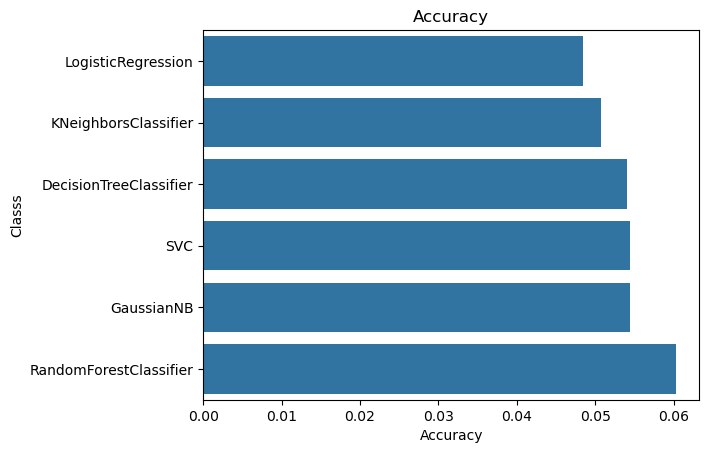

In [38]:
#вывод графика
plt.xlabel('Accuracy')
plt.title("Accuracy")
sns.set_color_codes("muted")
sns.barplot(x='Acc',y='Classs', data=log.sort_values(by="Acc"))


In [39]:
#обучение моделей и проверка на точность f1
log_col=["Classs","f1"]
log=pd.DataFrame(columns=log_col)
x_train, x_test, y_train, y_test = train_test_split(x[0:2000],y[0:2000],test_size=0.2,random_state=0)
acc_dict={}
start = time.perf_counter()
for clf in classs:
    name=clf.__class__.__name__
    clf.fit(x_train, y_train)
    train_predictions = clf.predict(x_test)
    acc = f1_score(y_test, train_predictions)
    if name in acc_dict:
        acc_dict[name]+=acc
    else:
        acc_dict[name] = acc
for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns = log_col)
    log = pd.concat([log,log_entry], ignore_index = True)


<Axes: title={'center': 'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classs'>

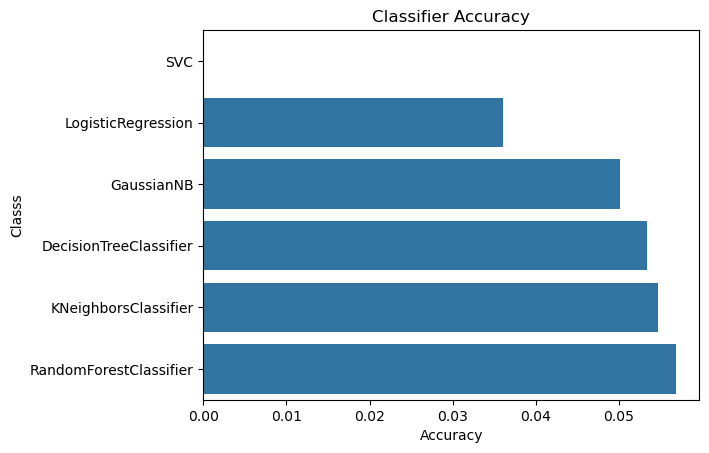

In [40]:
plt.xlabel('Accuracy')
plt.title("Classifier Accuracy")
sns.set_color_codes("muted")
sns.barplot(x='f1',y='Classs', data=log.sort_values(by="f1"))


In [41]:
finish = time.perf_counter()
print('Время работы: ' + str(finish - start))

Время работы: 0.9308322999859229


## Random Forest

In [43]:
# Запуск модели случайного леса
model = RandomForestClassifier(n_estimators=150, max_depth=20)

In [44]:
start = time.perf_counter()

In [45]:
from sklearn import metrics

In [46]:
#обучение модели
model.fit(df[df.columns[df.columns!='target']], df.target)

RandomForestClassifier(max_depth=20, n_estimators=150)

In [47]:
df_plot = pd.DataFrame({'features': df.columns[df.columns != 'target'],
                        'importances': model.feature_importances_})
df_plot = df_plot.sort_values('importances', ascending=False)

In [48]:
finish = time.perf_counter()
print('Время работы: ' + str(finish - start))

Время работы: 1843.904751199996


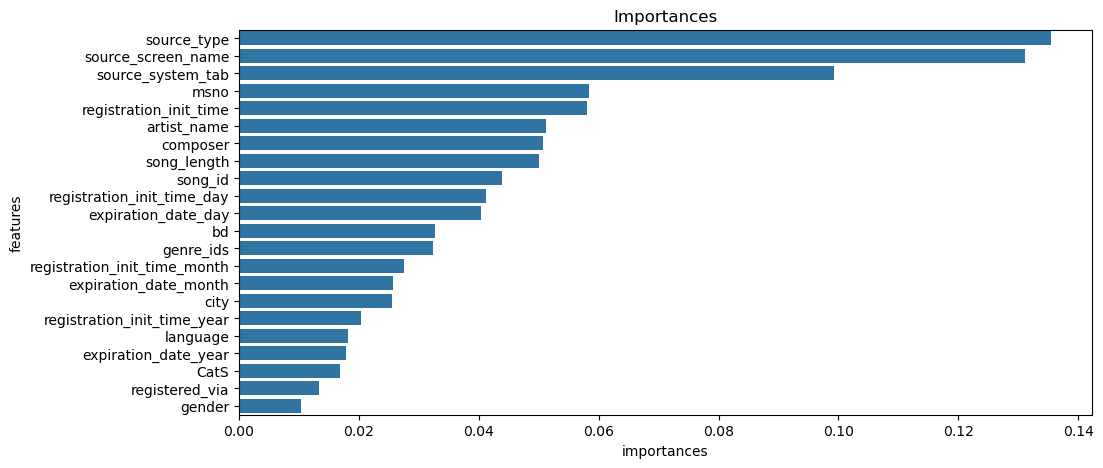

In [49]:
plt.figure(figsize=[11,5])
sns.barplot(x = df_plot.importances, y = df_plot.features)
plt.title('Importances')
plt.show()

In [50]:
# Убираем колонки имеющие важность < 0.03
df = df.drop(df_plot.features[df_plot.importances < 0.03].tolist(), axis=1)

In [51]:
# Selected columns
df.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'song_length', 'genre_ids', 'artist_name',
       'composer', 'bd', 'registration_init_time',
       'registration_init_time_day', 'expiration_date_day'],
      dtype='object')

#  Использование гиперпараметров


In [53]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
model = RandomForestClassifier()

In [54]:
x_train = x_train[:2000]
y_train = y_train[:2000]
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

In [55]:
# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=42)

In [56]:
# Случайный поиск гиперпараметров
random_search.fit(x_train, y_train)
ad = []
# лучшие значение метрики
print("Наилучшие гиперпараметры:", random_search.best_params_)
print("Наилучшее значение метрики:", random_search.best_score_)

Наилучшие гиперпараметры: {'max_depth': 40, 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 180}
Наилучшее значение метрики: 0.62625


In [57]:
from sklearn.metrics import roc_auc_score
model = RandomForestClassifier(max_depth=30, min_samples_leaf=14, min_samples_split=19, n_estimators=93, bootstrap=True, oob_score=True, n_jobs=1,
random_state=None, verbose=0, warm_start=False,
class_weight=None)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=14, min_samples_split=19,
                       n_estimators=93, n_jobs=1, oob_score=True)

In [58]:
z = model.predict(x_train)

In [59]:
oob_pred_prob = model.oob_decision_function_

In [60]:
oob_auc = roc_auc_score(y_train, oob_pred_prob[:, 1])
print("AUC-ROC (OOB): ", oob_auc)

AUC-ROC (OOB):  0.6502247906622287


In [61]:
test_pred_prob = model.predict_proba(x_test)

In [62]:
test_auc = roc_auc_score(y_test, test_pred_prob[:, 1])
print("AUC-ROC (Test): ", test_auc)

AUC-ROC (Test):  0.6004400110002751


In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = RandomForestClassifier(max_depth=30, min_samples_leaf=14, min_samples_split=19, n_estimators=93, n_jobs=1, oob_score=True)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.5625
Confusion Matrix:
[[110  89]
 [ 86 115]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.55      0.56       199
           1       0.56      0.57      0.57       201

    accuracy                           0.56       400
   macro avg       0.56      0.56      0.56       400
weighted avg       0.56      0.56      0.56       400



# Кластеризация

In [65]:
#использование кластеров для 
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

In [66]:
centers = [[1, 1], [-1, -1], [1, -1]]

X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)

In [67]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

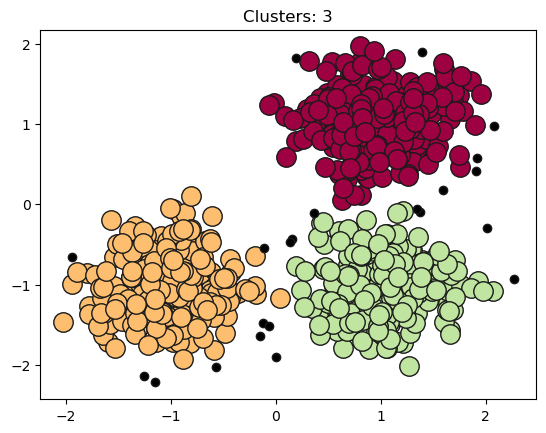

In [68]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    

    XY = X[class_member_mask & (labels != -1)]
    plt.plot(XY[:, 0], XY[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    XY = X[class_member_mask & (labels == -1)]
    plt.plot(XY[:, 0], XY[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
    Y = y[:len(labels)]

plt.title(f'Сlusters: {n_clusters_}')
plt.show()

In [69]:
print(f'Размер X: {x.shape}')
print(f'Размер Y: {y.shape}')
print(f'Размер labels_true: {labels_true.shape}')

Размер X: (5901934, 22)
Размер Y: (5901934,)
Размер labels_true: (750,)


In [71]:
#результаты после кластеризации
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
import numpy as np

X, y = make_classification(n_samples=20, n_features=20, random_state=42)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X)

X_new = np.hstack((X, clusters.reshape(-1, 1)))

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



## XGboost

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901934 entries, 0 to 5901933
Data columns (total 14 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   msno                        int16  
 1   song_id                     int32  
 2   source_system_tab           int8   
 3   source_screen_name          int8   
 4   source_type                 int8   
 5   target                      int64  
 6   song_length                 float64
 7   genre_ids                   int16  
 8   artist_name                 int32  
 9   composer                    int32  
 10  bd                          int64  
 11  registration_init_time      int16  
 12  registration_init_time_day  int32  
 13  expiration_date_day         int32  
dtypes: float64(1), int16(3), int32(5), int64(2), int8(3)
memory usage: 298.3 MB


In [76]:
df.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target', 'song_length', 'genre_ids', 'artist_name',
       'composer', 'bd', 'registration_init_time',
       'registration_init_time_day', 'expiration_date_day'],
      dtype='object')

In [78]:
#Разделение на тестовую и тренировочную выборки
target = df.pop('target')

In [80]:
print(target)

0          1
1          0
2          1
3          0
4          1
          ..
5901929    1
5901930    0
5901931    1
5901932    1
5901933    1
Name: target, Length: 5901934, dtype: int64


In [82]:

train_data, test_data, train_labels, test_labels = model_selection.train_test_split(df, target, test_size = 0.5)


In [83]:
start = time.perf_counter()

In [84]:
# Создание модели
model = xgb.XGBClassifier(learning_rate=0.3, max_depth=30, min_child_weight=5, n_estimators=150)
model.fit(train_data, train_labels)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=30, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [87]:
# Предсказание
predict_labels = model.predict(test_data)

In [88]:
finish = time.perf_counter()
print('Время работы: ' + str(finish - start))

Время работы: 84.52617339999415


In [89]:
#Результаты работы
print(metrics.classification_report(test_labels, predict_labels))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70   1464155
           1       0.71      0.71      0.71   1486812

    accuracy                           0.71   2950967
   macro avg       0.71      0.71      0.71   2950967
weighted avg       0.71      0.71      0.71   2950967

